In [38]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
#import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
#import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
#import plotly


In [39]:
data = pd.read_csv(r"C:/Users/parid/Downloads/drugsComTrain_raw.csv")

In [40]:
# data1 = pd.read_csv(r"C:/Users/Pragya Nainwal/Desktop/drugsComTrain_raw.csv")

In [41]:
data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [42]:
data=data[['review']]
data.head(5)

,review
0,"""It has no side effect, I take it in combinati..."
1,"""My son is halfway through his fourth week of ..."
2,"""I used to take another oral contraceptive, wh..."
3,"""This is my first time using any form of birth..."
4,"""Suboxone has completely turned my life around..."


In [43]:
data=data.iloc[0:30000,:]

In [44]:
# pu=data.iloc[0:3000,:]

In [45]:
# pu.to_csv("C:/Users/Pragya Nainwal/Desktop/pu1.csv")

In [46]:
data.head()

,review
0,"""It has no side effect, I take it in combinati..."
1,"""My son is halfway through his fourth week of ..."
2,"""I used to take another oral contraceptive, wh..."
3,"""This is my first time using any form of birth..."
4,"""Suboxone has completely turned my life around..."


In [47]:
data.shape

(30000, 1)

In [48]:
#Edits After Removing Stopwords
Edited_Review = data['review'].copy()
data['Review_without_stopwords'] = Edited_Review

In [49]:
data.head(5)

,review,Review_without_stopwords
0,"""It has no side effect, I take it in combinati...","""It has no side effect, I take it in combinati..."
1,"""My son is halfway through his fourth week of ...","""My son is halfway through his fourth week of ..."
2,"""I used to take another oral contraceptive, wh...","""I used to take another oral contraceptive, wh..."
3,"""This is my first time using any form of birth...","""This is my first time using any form of birth..."
4,"""Suboxone has completely turned my life around...","""Suboxone has completely turned my life around..."


In [50]:
data.head(5)

,review,Review_without_stopwords
0,"""It has no side effect, I take it in combinati...","""It has no side effect, I take it in combinati..."
1,"""My son is halfway through his fourth week of ...","""My son is halfway through his fourth week of ..."
2,"""I used to take another oral contraceptive, wh...","""I used to take another oral contraceptive, wh..."
3,"""This is my first time using any form of birth...","""This is my first time using any form of birth..."
4,"""Suboxone has completely turned my life around...","""Suboxone has completely turned my life around..."


In [51]:
nan_value = float("NaN")
data.replace("", nan_value, inplace=True)

data.dropna(subset = ["Review_without_stopwords"], inplace=True)
data.shape

(30000, 2)

In [52]:
print(nan_value)

nan


In [53]:
data.head()

,review,Review_without_stopwords
0,"""It has no side effect, I take it in combinati...","""It has no side effect, I take it in combinati..."
1,"""My son is halfway through his fourth week of ...","""My son is halfway through his fourth week of ..."
2,"""I used to take another oral contraceptive, wh...","""I used to take another oral contraceptive, wh..."
3,"""This is my first time using any form of birth...","""This is my first time using any form of birth..."
4,"""Suboxone has completely turned my life around...","""Suboxone has completely turned my life around..."


In [54]:
# Function to preprocess Reviews data
def preprocess_Reviews_data(data,name):
    # Proprocessing the data
    data[name]=data[name].str.lower()
    # Code to remove the Hashtags from the text
    #data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
    #data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text 
    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    # Code to remove all the single characters in the text
    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    # Remove the twitter handlers
#     data[name]=data[name].apply(lambda x:re.sub('@[^\s]+','',x))

# Function to tokenize and remove the stopwords    
def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen
        
        filtered_sentence = [] 

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 
        
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        
        return filtered_sentence
    # Using "getting(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

In [55]:
lemmatizer = WordNetLemmatizer()
def Lemmatization(data,name):
    def getting2(sen):
        example = sen
        output_sentence =[]
        word_tokens2 = word_tokenize(example)
        lemmatized_output = [lemmatizer.lemmatize(w) for w in word_tokens2]
        
        # Remove characters which have length less than 2  
        without_single_chr = [word for word in lemmatized_output if len(word) > 2]
        # Remove numbers
        cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
        
        return cleaned_data_title
    # Using "getting2(sen)" function to append edited sentence to data
    x=[]
    for i in data[name].values:
        x.append(getting2(i))
    data[name]=x

In [56]:
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [57]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\parid\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [58]:
# Using the preprocessing function to preprocess the hotel data
preprocess_Reviews_data(data,'Review_without_stopwords')
# Using tokenizer and removing the stopwords
rem_stopwords_tokenize(data,'Review_without_stopwords')
# Converting all the texts back to sentences
make_sentences(data,'Review_without_stopwords')

#Edits After Lemmatization
final_Edit = data['Review_without_stopwords'].copy()
data["After_lemmatization"] = final_Edit

# Using the Lemmatization function to lemmatize the hotel data
Lemmatization(data,'After_lemmatization')
# Converting all the texts back to sentences
make_sentences(data,'After_lemmatization')

In [59]:
data.head(6)

,review,Review_without_stopwords,After_lemmatization
0,"""It has no side effect, I take it in combinati...",side effecttake combination bystolic 5 mg fish...,side effecttake combination bystolic fish oil
1,"""My son is halfway through his fourth week of ...",son halfway fourth week intuniv became concern...,son halfway fourth week intuniv became concern...
2,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive 21 pill c...,used take another oral contraceptive pill cycl...
3,"""This is my first time using any form of birth...",first time using form birth control039gladwent...,first time using form birth control039gladwent...
4,"""Suboxone has completely turned my life around...",suboxone completely turned life aroundfeel hea...,suboxone completely turned life aroundfeel hea...
5,"""2nd day on 5mg started to work with rock hard...",2nd day 5mg started work rock hard erections h...,2nd day 5mg started work rock hard erection ho...


In [60]:
import nltk
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [61]:
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\parid\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\parid\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [62]:
pos=neg=obj=count=0

postagging = []

for review in data['After_lemmatization']:
    list = word_tokenize(review)
    postagging.append(nltk.pos_tag(list))

data['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())
#  self.obj_score = 1.0 - (self.pos_score + self.neg_score)

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0
    
    ###################################################################################
senti_score = []

for pos_val in data['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
data['senti_score'] = senti_score
print(data['senti_score'])

print(data.head(5))

0       -0.125
1        1.250
2        1.250
3       -0.750
4        2.500
         ...  
29995   -0.250
29996    1.625
29997   -0.875
29998    0.625
29999    0.125
Name: senti_score, Length: 30000, dtype: float64
                                              review  \
0  "It has no side effect, I take it in combinati...   
1  "My son is halfway through his fourth week of ...   
2  "I used to take another oral contraceptive, wh...   
3  "This is my first time using any form of birth...   
4  "Suboxone has completely turned my life around...   

                            Review_without_stopwords  \
0  side effecttake combination bystolic 5 mg fish...   
1  son halfway fourth week intuniv became concern...   
2  used take another oral contraceptive 21 pill c...   
3  first time using form birth control039gladwent...   
4  suboxone completely turned life aroundfeel hea...   

                                 After_lemmatization  \
0     side effecttake combination bystolic fish oil    


In [63]:
data.head()

,review,Review_without_stopwords,After_lemmatization,pos_tags,senti_score
0,"""It has no side effect, I take it in combinati...",side effecttake combination bystolic 5 mg fish...,side effecttake combination bystolic fish oil,"[(side, NN), (effecttake, VB), (combination, N...",-0.125
1,"""My son is halfway through his fourth week of ...",son halfway fourth week intuniv became concern...,son halfway fourth week intuniv became concern...,"[(son, NN), (halfway, RB), (fourth, JJ), (week...",1.250
2,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive 21 pill c...,used take another oral contraceptive pill cycl...,"[(used, VBN), (take, VB), (another, DT), (oral...",1.250
3,"""This is my first time using any form of birth...",first time using form birth control039gladwent...,first time using form birth control039gladwent...,"[(first, JJ), (time, NN), (using, VBG), (form,...",-0.750
4,"""Suboxone has completely turned my life around...",suboxone completely turned life aroundfeel hea...,suboxone completely turned life aroundfeel hea...,"[(suboxone, NN), (completely, RB), (turned, VB...",2.500


In [64]:
overall=[]
for i in range(len(data)):
    if data['senti_score'][i]> 0.05:
        overall.append('Positive')
    elif data['senti_score'][i]< -0.05:
        overall.append('Negative')
    else:
        overall.append('Neutral')
data['Overall Sentiment']=overall

In [65]:
data.head(10)

,review,Review_without_stopwords,After_lemmatization,pos_tags,senti_score,Overall Sentiment
0,"""It has no side effect, I take it in combinati...",side effecttake combination bystolic 5 mg fish...,side effecttake combination bystolic fish oil,"[(side, NN), (effecttake, VB), (combination, N...",-0.125,Negative
1,"""My son is halfway through his fourth week of ...",son halfway fourth week intuniv became concern...,son halfway fourth week intuniv became concern...,"[(son, NN), (halfway, RB), (fourth, JJ), (week...",1.250,Positive
2,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive 21 pill c...,used take another oral contraceptive pill cycl...,"[(used, VBN), (take, VB), (another, DT), (oral...",1.250,Positive
3,"""This is my first time using any form of birth...",first time using form birth control039gladwent...,first time using form birth control039gladwent...,"[(first, JJ), (time, NN), (using, VBG), (form,...",-0.750,Negative
4,"""Suboxone has completely turned my life around...",suboxone completely turned life aroundfeel hea...,suboxone completely turned life aroundfeel hea...,"[(suboxone, NN), (completely, RB), (turned, VB...",2.500,Positive
5,"""2nd day on 5mg started to work with rock hard...",2nd day 5mg started work rock hard erections h...,2nd day 5mg started work rock hard erection ho...,"[(2nd, CD), (day, NN), (5mg, CD), (started, VB...",-2.000,Negative
6,"""He pulled out, but he cummed a bit in me. I t...",pulled cummedbit metook plan26 hours later too...,pulled cummedbit metook plan26 hour later took...,"[(pulled, JJ), (cummedbit, NN), (metook, NN), ...",0.125,Positive
7,"""Abilify changed my life. There is hope. I was...",abilify changed life hopewas zoloft clonidine ...,abilify changed life hopewas zoloft clonidine ...,"[(abilify, VB), (changed, VBN), (life, NN), (h...",-1.000,Negative
8,""" I Ve had nothing but problems with the Kepp...",nothing problems keppera constant shaking arms...,nothing problem keppera constant shaking arm a...,"[(nothing, NN), (problem, NN), (keppera, NN), ...",-1.625,Negative
9,"""I had been on the pill for many years. When m...",pill many years doctor changed rx chateal effe...,pill many year doctor changed chateal effectiv...,"[(pill, NN), (many, JJ), (year, NN), (doctor, ...",1.750,Positive


In [66]:
data.drop(['review'],axis=1,inplace=True)
data.drop(['Review_without_stopwords'],axis=1,inplace=True)
data.drop(['pos_tags'],axis=1,inplace=True)
data.drop(['senti_score'],axis=1,inplace=True)

In [67]:
data.head(5)

,After_lemmatization,Overall Sentiment
0,side effecttake combination bystolic fish oil,Negative
1,son halfway fourth week intuniv became concern...,Positive
2,used take another oral contraceptive pill cycl...,Positive
3,first time using form birth control039gladwent...,Negative
4,suboxone completely turned life aroundfeel hea...,Positive


C:\Users\parid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall Sentiment', ylabel='count'>

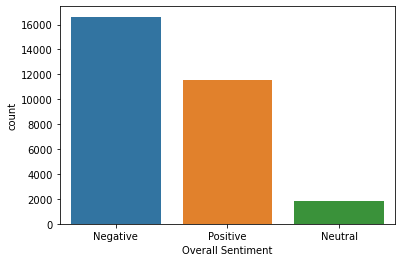

In [68]:
import seaborn as sns
sns.countplot(data['Overall Sentiment'])

In [69]:
data['reviews_text_new'] = data['After_lemmatization'].copy()

In [70]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(data['reviews_text_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head(3)

MemoryError: Unable to allocate 21.8 GiB for an array with shape (30000, 97418) and data type int64

In [ ]:
vect = CountVectorizer()
vect.fit(data['reviews_text_new'])
vect.get_feature_names()
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(data['reviews_text_new'])
df = pd.DataFrame(simple_train_dtm.toarray(), columns = vec.get_feature_names())
print(df.head(3))

In [ ]:
### Creating a python object of the class CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             ngram_range=(1,3)) # number of n-grams

bow_data = bow_counts.fit_transform(data['reviews_text_new'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    data['Overall Sentiment'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random

In [ ]:
import sklearn.metrics as metrics
# import sklearn.metrics import accuracy_score 

In [ ]:
from sklearn.linear_model import LogisticRegression
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction


## Calculate key performance metrics
accuracy = metrics.accuracy_score(y_test_bow, test_pred_lr_all)
accuracy 
# from sklearn.metrics import classification_report
# # Print a classification report
# print(classification_report(y_test_bow,test_pred_lr_all))

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# noise_words = []
# ### Creating a python object of the class CountVectorizer
# tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
#                                stop_words=noise_words, # List of stopwords
#                                ngram_range=(1,1)) # number of n-grams

# tfidf_data = tfidf_counts.fit_transform(data['reviews_text_new'])

In [ ]:
# X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
#                                                                             data['Overall Sentiment'],
#                                                                             test_size = 0.2,
#                                                                             random_state = 0)

In [ ]:
### Setting up the model class
# lr_model_tf_idf = LogisticRegression()

# ## Training the model 
# lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

# ## Prediciting the results
# test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

# ## Calculate key performance metrics

# accuracy = metrics.accuracy_score(y_test_tfidf, test_pred_lr_all)
# accuracy 
# # Print a classification report
# # print(classification_report(y_test_tfidf,test_pred_lr_all))

In [ ]:
# test_pred_lr_all